In [7]:
# Erasmus+ ICCT project (2018-1-SI01-KA203-047081)

%matplotlib notebook
import control as c
import ipywidgets as w
import numpy as np

from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Toggle cell visibility

from IPython.display import HTML
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.input').hide()
    } else {
        $('div.input').show()
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Toggle cell visibility <a href="javascript:code_toggle()">here</a>.''')
display(tag)

# Hide the code completely

# from IPython.display import HTML
# tag = HTML('''<style>
# div.input {
#     display:none;
# }
# </style>''')
# display(tag)

Traceback (most recent call last):
  File "C:\Users\Uporabnik\Anaconda3\envs\icct2\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Uporabnik\Anaconda3\envs\icct2\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


## PID krmiljenje sistemov prvega reda s časovnim zadržkom

V tem primeru je prikazana uporaba PID krmilnika (oziroma enega izmed njegovih podtipov) za krmiljenje LTI sistema prvega reda s časovnim zadržkom.

Časovni zadržek je simuliran z uporabo Padéjeve aproksimacije, ki omogoča, da sistem ostane linearen. Aproksimant je ulomek dveh polinomov visoke stopnje, ki ju lahko vključimo v prenosno funkcijo kot povratno zvezo.

<br>
$$G_{Padé}(s)=\frac{\sum_{i=0}^{m}a_ix^i}{1+\sum_{j=1}^{n}b_jx^j}$$
<img src="Images/first_order_time_delay.png" width="40%" />
<b>Izebri časovno konstanto sistema skupaj s časovnim zadržkom in stopnjo polinoma imenovalca v aproksimantu!</b>

<!-- In the following example, we'll be using a PID controller (or one of its subtypes) to control an LTI (linear time-invariant system) that is approximating a first-order system with a time delay.

The time delay is simulated using the Padé approximation, allowing the system to remain linear. The approximant is a fraction of two large polynomials that can be included in the transfer function as the feedback system.

<br>
$$G_{Padé}(s)=\frac{\sum_{i=0}^{m}a_ix^i}{1+\sum_{j=1}^{n}b_jx^j}$$
<img src="Images/first_order_time_delay.png" width="40%" />
<b>Choose a time constant for the system, along with the desired time delay and the degree of the approximating polynomial!</b> -->

<IPython.core.display.Javascript object>


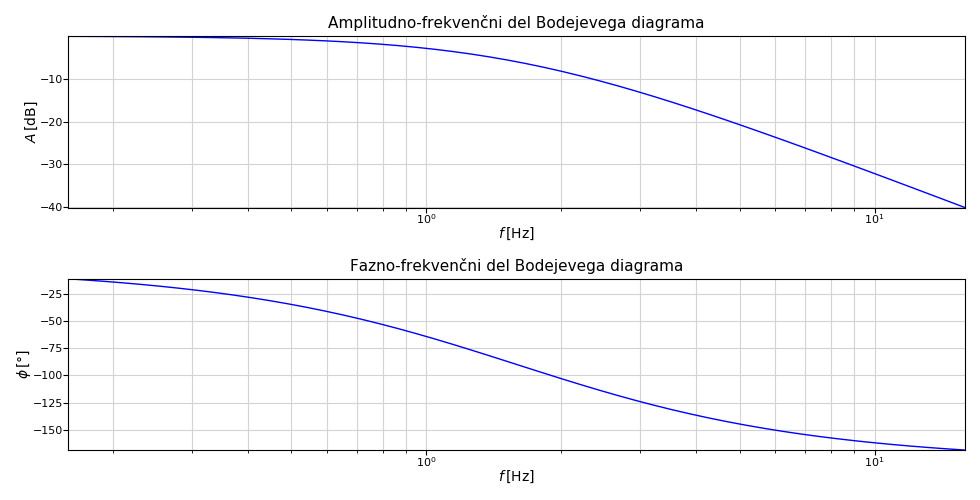

Output()

In [8]:
# Figure definition

fig1, ((f1_ax1), (f1_ax2)) = plt.subplots(2, 1, num='Slika 1')
fig1.set_size_inches((9.8, 5))
fig1.set_tight_layout(True)

f1_line1, = f1_ax1.plot([], [])
f1_line2, = f1_ax2.plot([], [])  

f1_ax1.grid(which='both', axis='both', color='lightgray')
f1_ax2.grid(which='both', axis='both', color='lightgray')

f1_ax1.autoscale(enable=True, axis='both', tight=True)
f1_ax2.autoscale(enable=True, axis='both', tight=True)

f1_ax1.set_title('Amplitudno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax1.set_xscale('log')
f1_ax1.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax1.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=10)
f1_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

f1_ax2.set_title('Fazno-frekvenčni del Bodejevega diagrama', fontsize=11)
f1_ax2.set_xscale('log')
f1_ax2.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=10)
f1_ax2.set_ylabel(r'$\phi\/[°]$', labelpad=0, fontsize=10)
f1_ax2.tick_params(axis='both', which='both', pad=0, labelsize=8)   


# System model

def system_model(T1, Tdelay, pade_deg):

    del_num, del_den = c.pade(Tdelay, pade_deg, -1)
    W_sysnodel = c.tf([1], [T1, 1])
    W_sys = c.series(W_sysnodel, c.tf(del_num, del_den))

    print('Prenosna funkcija sistema brez časovnega zadržka:')
    print(W_sysnodel)

    # System analysis

    poles = c.pole(W_sysnodel)  # Poles

    print('Poli sistema brez časovnega zadržka:\n')
    print(poles)
    
    global f1_line1, f1_line2
    
    f1_ax1.lines.remove(f1_line1)
    f1_ax2.lines.remove(f1_line2)

    mag, phase, omega = c.bode_plot(W_sys, Plot=False)   # Bode-plot

    f1_line1, = f1_ax1.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f1_line2, = f1_ax2.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')   

    f1_ax1.relim()
    f1_ax2.relim()
    f1_ax1.autoscale_view()
    f1_ax2.autoscale_view()
    
# GUI widgets
style = {'description_width': 'initial','button_width':'180px'}
T1_slider = w.FloatLogSlider(value=0.1, base=10, min=-4, max=1, description='T1 [s] :', continuous_update=False,
                             layout=w.Layout(width='75%'))
Tdelay_slider = w.FloatLogSlider(value=0.1, base=10, min=-2, max=0, description='zadržek [s] :', continuous_update=False,
                             layout=w.Layout(width='75%'))
deg_slider = w.IntSlider(value=1, min=1, max=10, step=1, description='Stopnja Padéjevega imenovalca:', continuous_update=False,
                         layout=w.Layout(width='75%'), style=style)

input_data = w.interactive_output(system_model, {'T1':T1_slider, 'Tdelay':Tdelay_slider, 'pade_deg':deg_slider})

display(w.HBox([T1_slider, Tdelay_slider, deg_slider]), input_data)

Po končani seznanitvi s karakteristiko sistema <b>izberi tip krmilnika!</b>

<!-- After observing the system's characteristics, <b>select a controller type!</b> -->

In [9]:
#Controller type select

typeSelect = w.ToggleButtons(
    options=[('P', 0), ('PI', 1), ('PD', 2), ('PID', 3), ('realni PID', 4)],
    description='Tip krmilnika: ', style={'description_width':'15%'})

display(typeSelect)

ToggleButtons(description='Tip krmilnika: ', options=(('P', 0), ('PI', 1), ('PD', 2), ('PID', 3), ('realni PID…

<b>Nastavi izbran PID krmilnik tako, da bodo čas prevzpona, čas umiritve, prenihaj in odstopek v stacionarnem stanju minimalni.</b><br>
Optimalnih vrednosti naštetih parametrov ni možno doseči z eno samo nastavitvijo PID krmilnika. Ustvari več rešitev, od katerih vsako prilagodi za posamezen parameter.

<!-- <b>Tune the selected controller so that rising/settling time, overshoot, or remaining error is minimized!</b><br>
It is not possible to get the best results for each parameter in a single setup. Create multiple solutions, one for each type! -->

<IPython.core.display.Javascript object>


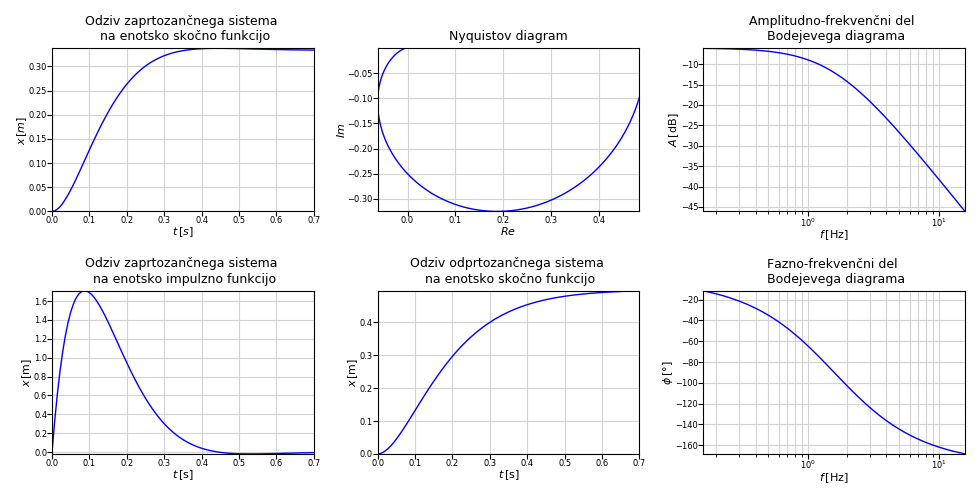

Output()

In [10]:
# PID control

# Figure definition
fig2, ((f2_ax1, f2_ax2, f2_ax3), (f2_ax4, f2_ax5, f2_ax6)) = plt.subplots(2, 3, num='Slika 2')
fig2.set_size_inches((9.8, 5))
fig2.set_tight_layout(True)

f2_line1, = f2_ax1.plot([], [])
f2_line2, = f2_ax2.plot([], []) 
f2_line3, = f2_ax3.plot([], [])
f2_line4, = f2_ax4.plot([], [])  
f2_line5, = f2_ax5.plot([], [])
f2_line6, = f2_ax6.plot([], [])

f2_ax1.grid(which='both', axis='both', color='lightgray')
f2_ax2.grid(which='both', axis='both', color='lightgray')
f2_ax3.grid(which='both', axis='both', color='lightgray')
f2_ax4.grid(which='both', axis='both', color='lightgray')
f2_ax5.grid(which='both', axis='both', color='lightgray')
f2_ax6.grid(which='both', axis='both', color='lightgray')

f2_ax1.autoscale(enable=True, axis='both', tight=True)
f2_ax2.autoscale(enable=True, axis='both', tight=True)
f2_ax3.autoscale(enable=True, axis='both', tight=True)
f2_ax4.autoscale(enable=True, axis='both', tight=True)
f2_ax5.autoscale(enable=True, axis='both', tight=True)
f2_ax6.autoscale(enable=True, axis='both', tight=True)

f2_ax1.set_title('Odziv zaprtozančnega sistema \n na enotsko skočno funkcijo', fontsize=9)
f2_ax1.set_xlabel(r'$t\/[s]$', labelpad=0, fontsize=8)
f2_ax1.set_ylabel(r'$x\/[m]$', labelpad=0, fontsize=8)
f2_ax1.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax2.set_title('Nyquistov diagram', fontsize=9)
f2_ax2.set_xlabel(r'$Re$', labelpad=0, fontsize=8)
f2_ax2.set_ylabel(r'$Im$', labelpad=0, fontsize=8)
f2_ax2.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax3.set_title('Amplitudno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax3.set_xscale('log')
f2_ax3.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax3.set_ylabel(r'$A\/$[dB]', labelpad=0, fontsize=8)
f2_ax3.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax4.set_title('Odziv zaprtozančnega sistema \n na enotsko impulzno funkcijo', fontsize=9)
f2_ax4.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax4.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax4.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax5.set_title('Odziv odprtozančnega sistema \n na enotsko skočno funkcijo', fontsize=9)
f2_ax5.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=8)
f2_ax5.set_ylabel(r'$x\/$[m]', labelpad=0, fontsize=8)
f2_ax5.tick_params(axis='both', which='both', pad=0, labelsize=6)

f2_ax6.set_title('Fazno-frekvenčni del \n Bodejevega diagrama', fontsize=9)
f2_ax6.set_xscale('log')
f2_ax6.set_xlabel(r'$f\/$[Hz]', labelpad=0, fontsize=8)
f2_ax6.set_ylabel(r'$\phi\/$[°]', labelpad=0, fontsize=8)
f2_ax6.tick_params(axis='both', which='both', pad=0, labelsize=6)

def pid_control(Kp, Ti, Td, Fd, type_select, T1, Tdelay, pade_deg):
    
    del_num, del_den = c.pade(Tdelay, pade_deg, -1)
    W_sys = c.series( c.tf([1], [T1, 1]), c.tf(del_num, del_den))
    
    if type_select in (1, 3, 4):
        Ti0 = 1
    else:
        Ti0 = 0
        
    if type_select in (2, 3, 4):
        Td0 = 1
    else :
        Td0 = 0
        
    if type_select == 4:
        Fd0 = 1
    else:
        Fd0 = 0
    
    # PID Controller
    
    P = Kp             # Proportional term
    I = Kp / Ti        # Integral term
    D = Kp * Td        # Derivative term
    Td_f = Td / Fd     # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0 * Fd0, 1]))  # PID controller in time constant format
    
    W_open = c.series(W_PID, W_sys)         # Open loop
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
                        
    # Display
                        
    global f2_line1, f2_line2, f2_line3, f2_line4, f2_line5, f2_line6
    
    f2_ax1.lines.remove(f2_line1)
    f2_ax2.lines.remove(f2_line2)
    f2_ax3.lines.remove(f2_line3)
    f2_ax4.lines.remove(f2_line4)
    f2_ax5.lines.remove(f2_line5)
    f2_ax6.lines.remove(f2_line6)
    
    tout, yout = c.step_response(W_closed)
    f2_line1, = f2_ax1.plot(tout, yout, lw=1, color='blue') 

    _, _, ob = c.nyquist_plot(W_open, Plot=False)   # Small resolution plot to determine bounds        
    real, imag, freq = c.nyquist_plot(W_open, omega=np.logspace(np.log10(ob[0]), np.log10(ob[-1]), 1000), Plot=False)
    f2_line2, = f2_ax2.plot(real, imag, lw=1, color='blue')
    
    mag, phase, omega = c.bode_plot(W_open, Plot=False)
    f2_line3, = f2_ax3.plot(omega/2/np.pi, 20*np.log10(mag), lw=1, color='blue')
    f2_line6, = f2_ax6.plot(omega/2/np.pi, phase*180/np.pi, lw=1, color='blue')

    tout, yout = c.impulse_response(W_closed)
    f2_line4, = f2_ax4.plot(tout, yout, lw=1, color='blue')   
    
    tout, yout = c.step_response(W_open)
    f2_line5, = f2_ax5.plot(tout, yout, lw=1, color='blue') 
    
    f2_ax1.relim()
    f2_ax2.relim()
    f2_ax3.relim()
    f2_ax4.relim()
    f2_ax5.relim()
    f2_ax6.relim()
    f2_ax1.autoscale_view()
    f2_ax2.autoscale_view()
    f2_ax3.autoscale_view()
    f2_ax4.autoscale_view()
    f2_ax5.autoscale_view()
    f2_ax6.autoscale_view()
    
# GUI widgets

def draw_controllers(type_select):
    
    global Kp_slider
    global Ti_slider
    global Td_slider
    global Fd_slider
    
    Kp_slider = w.FloatLogSlider(value=0.5, base=10, min=-1, max=4, description='Kp:', continuous_update=False,
                                 layout=w.Layout(width='auto', flex='5 5 auto'))
    
    if type_select in (1, 3, 4):
        Ti_slider = w.FloatLogSlider(value=0.0035, base=10, min=-4, max=1, description='Ti:', continuous_update=False,
                                     layout=w.Layout(width='auto', flex='5 5 auto'))
    else:
        Ti_slider = w.FloatLogSlider(value=0.0035, base=10, min=-4, max=1, description='Ti:', continuous_update=False,
                                     layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)
        
    if type_select in (2, 3, 4):
        Td_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description='Td:', continuous_update=False,
                                     layout=w.Layout(width='auto', flex='5 5 auto'))
    else:
        Td_slider = w.FloatLogSlider(value=1, base=10, min=-4, max=1, description='Td:', continuous_update=False,
                                     layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)
    
    if type_select == 4:
        Fd_slider = w.FloatLogSlider(value=1, base=10, min=0, max=3, description='Fd:', continuous_update=False,
                                     layout=w.Layout(width='auto', flex='5 5 auto'))
    else:
        Fd_slider = w.FloatLogSlider(value=1, base=10, min=0, max=3, description='Fd:', continuous_update=False,
                                     layout=w.Layout(width='auto', flex='5 5 auto'), disabled=True)


    input_data = w.interactive_output(pid_control, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,
                                      'Fd': Fd_slider, 'type_select':typeSelect, 'T1':T1_slider, 'Tdelay':Tdelay_slider,
                                      'pade_deg':deg_slider})

    display(w.HBox([Kp_slider, Ti_slider, Td_slider, Fd_slider]), input_data)
    
w.interactive_output(draw_controllers, {'type_select':typeSelect})

Z uporabo spodnje simulacije testiraj, kako dobro krmiljeni sistem sledi izbranemu vstopnemu signalu.<br>
<b>Prilagodi nastavitve krmilnika tako, da bo sistem sprejemljivo sledil sinusni funkciji!</b>
<br><br>
<i>(Animacija je prilagojena na način, da se znotraj enega simulacijskega cikla (prikazan na diagramu) odziv sistema ne spreminja. Zaradi tega se, ob spremembi nastavitev PID krmilnika, nestabilne rešitve pokažejo šele v zadnji sekundi simulacijskega cikla.)</i>

<!-- You can test the controlled system's signal following capabilities using the simulated scope.<br>
<b>Readjust your controller so that it can follow a sine wave acceptably!</b>
<br><br>
<i>(The animations are scaled to fit the frame through the whole simulation. Because of this, unstable solutions might not seem to move until the very last second.)</i> -->

<IPython.core.display.Javascript object>


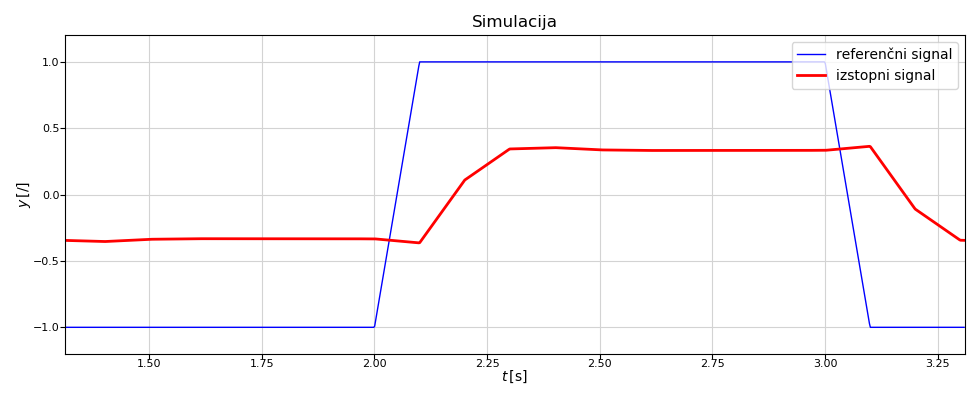

Output()

In [11]:
# Simulation data

anim_fig = plt.figure(num='Animacija 1')
anim_fig.set_size_inches((9.8, 4))
anim_fig.set_tight_layout(True)

anim_ax1 = anim_fig.add_subplot(111)

frame_count=1000
scope_rounds=4

l1 = anim_ax1.plot([], [], lw=1, color='blue')
l2 = anim_ax1.plot([], [], lw=2, color='red')

line1 = l1[0]
line2 = l2[0]

anim_ax1.legend(l1+l2, ['referenčni signal', 'izstopni signal'], loc=1)

anim_ax1.set_title('Simulacija', fontsize=12)
anim_ax1.set_xlabel(r'$t\/$[s]', labelpad=0, fontsize=10)
anim_ax1.set_ylabel(r'$y\/$[/]', labelpad=0, fontsize=10)
anim_ax1.tick_params(axis='both', which='both', pad=0, labelsize=8)

anim_ax1.grid(which='both', axis='both', color='lightgray')

T_plot = []
X_plot = []
R_plot = []

#Simulation function

def simulation(Kp, Ti, Td, Fd, type_select, T1, Tdelay, pade_deg, T, dt, X, Xf, Xa):
    
    del_num, del_den = c.pade(Tdelay, pade_deg)
    W_sys = c.series( c.tf([1], [T1, 1]), c.tf(del_num, del_den))
    
    if type_select in (1, 3, 4):
        Ti0 = 1
    else:
        Ti0 = 0
        
    if type_select in (2, 3, 4):
        Td0 = 1
    else :
        Td0 = 0
        
    if type_select == 4:
        Fd0 = 1
    else:
        Fd0 = 0
    
    # Controller
    P = Kp            # Proportional term
    I = Kp / Ti       # Integral term
    D = Kp * Td       # Derivative term
    Td_f = Td * Fd    # Derivative term filter
    
    W_PID = c.parallel(c.tf([P], [1]),
                       c.tf([I * Ti0], [1 * Ti0, 1 * (not Ti0)]),
                       c.tf([D * Td0, 0], [Td_f * Td0 * Fd0, 1]))    # PID controller
    
    # Model
    W_open = c.series(W_PID, W_sys)         # Open loop
    W_closed = c.feedback(W_open, 1, -1)    # Closed loop with negative feedback
    
    # Reference and disturbance signals

    T_sim = np.arange(0, T, dt, dtype=np.float64)
    
    if X == 0:   # Sine wave reference
        X_sim = np.sin(2 * np.pi * Xf * T_sim) * Xa
    elif X == 1:   # Square wave reference
        X_sim = np.sign(np.sin(2 * np.pi * Xf * T_sim)) * Xa
    
    # System response
        
    Tx, youtx, xoutx = c.forced_response(W_closed, T_sim, X_sim)
    R_sim = youtx
    
    # Display
    
    XR_max = max(np.amax(np.absolute(np.concatenate((X_sim, R_sim)))), Xa)
    if not np.isnan(XR_max):
        anim_ax1.set_ylim((-1.2 * XR_max, 1.2 * XR_max))
    
    global T_plot, X_plot, R_plot
    
    T_plot = np.linspace(0, T, frame_count*(scope_rounds+1), dtype=np.float32)
    X_plot = np.interp(T_plot, T_sim, X_sim)
    R_plot = np.interp(T_plot, T_sim, R_sim)
        
def anim_init():
    line1.set_data([], [])
    line2.set_data([], [])
    anim_ax1.set_xlim((0, T_plot[frame_count-1]))
    
    return (line1, line2, anim_ax1,)

def animate(i):
    line1.set_data(T_plot[scope_rounds*i:scope_rounds*i+frame_count-1], X_plot[scope_rounds*i:scope_rounds*i+frame_count-1])
    line2.set_data(T_plot[scope_rounds*i:scope_rounds*i+frame_count-1], R_plot[scope_rounds*i:scope_rounds*i+frame_count-1])
    anim_ax1.set_xlim((T_plot[i*scope_rounds], T_plot[i*scope_rounds+frame_count-1]))
    
    return (line1, line2, anim_ax1,)

anim = animation.FuncAnimation(anim_fig, animate, init_func=anim_init,
                               frames=frame_count, interval=10, blit=True,
                               repeat=True)

# Controllers

T_slider = w.FloatLogSlider(value=10, base=10, min=-0.7, max=1, step=0.01,
                            description='trajanje [s]:', continuous_update=False,
                            orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))

dt_slider = w.FloatLogSlider(value=0.1, base=10, min=-3, max=-1, step=0.01,
                             description='časovni korak [s]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
style = {'description_width': 'initial'}       
X_type = w.Dropdown(options=[('sinusni signal', 0), ('kvadratni val', 1)], value=1,
                    description='Referenčni signal: ', continuous_update=False, style=style, layout=w.Layout(width='auto', flex='3 3 auto'))    
Xf_slider = w.FloatLogSlider(value=0.5, base=10, min=-2, max=2, step=0.01,
                             description='frekvenca [Hz]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))
Xa_slider = w.FloatLogSlider(value=1, base=10, min=-2, max=2, step=0.01,
                             description='amplituda [/]:', continuous_update=False,
                             orientation='vertical', layout=w.Layout(width='auto', height='auto', flex='1 1 auto'))    

input_data = w.interactive_output(simulation, {'Kp': Kp_slider, 'Ti': Ti_slider, 'Td': Td_slider,'Fd': Fd_slider,
                                               'type_select': typeSelect, 'T1': T1_slider,
                                               'Tdelay':Tdelay_slider, 'pade_deg':deg_slider,
                                               'T': T_slider, 'dt': dt_slider,
                                               'X': X_type, 'Xf': Xf_slider, 'Xa': Xa_slider})

display(w.HBox([w.HBox([T_slider, dt_slider], layout=w.Layout(width='25%')),
                w.Box([], layout=w.Layout(width='5%')),
                w.VBox([X_type, w.HBox([Xf_slider, Xa_slider])], layout=w.Layout(width='30%')),
                w.Box([], layout=w.Layout(width='5%'))],
                layout=w.Layout(width='100%', justify_content='center')), input_data)


Parameter *trajanje* vpliva na prikaz simulacije, parameter *časovni korak* pa vpliva na frekvenco vzročenja in s tem izboljša rezultat, a na račun povečane računske moči.

<!-- The duration parameter controls the simulated timeframe and does not affect the runtime of the animation. In contrast, the timestep controls the model sampling and can refine the results in exchange for higher computational resources. -->